# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [3]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [5]:
#average_age
print(df['Age'].mean())
#survivor
print(df[df['Survived']==1]['Age'].mean())
#A non-surviving first-class passenger
print(df[(df['Survived']==0) & (df['Pclass']==1)]['Age'].mean())
#Male survivors older than 30 from anywhere but Queenstown
print(df[(df['Survived']==0) & (df['Age']>30)&(df['Embarked']!='Q')]['Age'].mean())

29.69911764705882
28.343689655172415
43.6953125
43.641176470588235


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [4]:
print(df['Age'].mean()-df['Age'].median())
#survivor
print(df[df['Survived']==1]['Age'].mean()-df[df['Survived']==1]['Age'].median())
#A non-surviving first-class passenger
print(df[(df['Survived']==0) & (df['Pclass']==1)]['Age'].mean()-df[(df['Survived']==0) & (df['Pclass']==1)]['Age'].median())
#Male survivors older than 30 from anywhere but Queenstown
print(df[(df['Survived']==0) & (df['Age']>30)&(df['Embarked']!='Q')]['Age'].mean()-df[(df['Survived']==0) & (df['Age']>30)&(df['Embarked']!='Q')]['Age'].median())

1.69911764705882
0.34368965517241534
-1.5546875
2.141176470588235


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [23]:
print("The most common Passenger class is: {}".format(df.groupby('Pclass').count().iloc[:,0].idxmax()))
print("The most common Port of Embarkation is: {}".format(df.groupby('Embarked').count().iloc[:,0].idxmax()))
print("The most common Number of siblings or spouses aboard for survivors is: {}".format(df.groupby('SibSp').count().iloc[:,0].idxmax()))

The most common Passenger class is: 3
The most common Port of Embarkation is: S
The most common Number of siblings or spouses aboard for survivors is: 0


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [6]:
median=df['Fare'].median()
mean=df['Fare'].mean()
std=df['Fare'].std()
print("The median is {}.".format(median))
print("The mean is {}.".format(mean))
print("The standard deviation is {}.".format(std))

if median > mean:
    print("The median is above the mean.")
elif median == mean:
    print("The median is equal to the mean.")
else:
    print("The median is below the mean.")

if mean - std < median and mean + std > median:
    print("The difference between the mean and the of median is smaller then the standard deviantion.")
elif mean - 2 * std < median and mean + 2 * std > median:
    print("The difference between the mean and the of median is smaller then 2 times the standard deviantion.")
elif mean - 3 * std < median and mean + 3 * std > median:
    print("The difference between the mean and the of median is smaller then 3 times the standard deviantion.")
else: 
    print("The difference between the mean and the of median is bigger than 3 times the standard deviation.")

The median is 14.4542.
The mean is 32.2042079685746.
The standard deviation is 49.693428597180905.
The median is below the mean.
The difference between the mean and the of median is smaller then the standard deviantion.


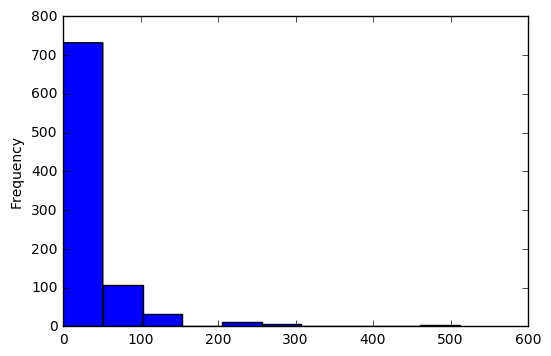

In [39]:
import matplotlib
%matplotlib inline
df['Fare'].plot(x='Fare', kind='hist')

**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [15]:
#How much more expensive was the 90th percentile ticket than the 5th percentile ticket
print("The difference between the 90th percentile ticket and the 5th percentile ticket is {}.".format(df['Fare'].quantile(.9)-df['Fare'].quantile(.05)))
#Are they the same class?
fare_90=df['Fare'].quantile(.9)
fare_05=df['Fare'].quantile(.05)
statement=df[df['Fare']==fare_90]['Pclass'].unique()[0]==df[df['Fare']==fare_05]['Pclass'].unique()[0]
print( "The statement, that the 90th percentile ticket and the 5th percentile ticket has the same class is: {}. ".format(statement))

The difference between the 90th percentile ticket and the 5th percentile ticket is 70.7333.
The statement, that the 90th percentile ticket and the 5th percentile ticket has the same class is: False. 


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [59]:
mapping_port={'C': 'Cherbourg', 'Q': 'Queenstown', 'S':'Southampton'}
port_exp=df[df['Embarked'].notnull()][['Fare','Embarked']].groupby('Embarked').mean().idxmax()

In [36]:
print ("The highest average ticket price was paid by passengers from : {}.".format(mapping_port[port_exp[0]]))

The highest average ticket price was paid by passengers from : Cherbourg.


**What is the most common passenger class for each port?**

In [73]:
for k,v in mapping_port.items():
    print(v , df[df['Embarked']==k].groupby(['Sex','Age']).count().iloc[:,0].idxmax())

Southampton ('male', 19.0)
Cherbourg ('female', 24.0)
Queenstown ('female', 16.0)


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [84]:
#What fraction of surviving 1st-class males paid lower than double the overall median ticket price?
total_filtered=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'male')].size
median=df['Fare'].median()
total_filt_lowprice=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'male') &(df['Fare'] < 2 * median)].size
print ( "{}% of surviving 1st-class males paid lower than double the overall median ticket price.".format(round((total_filt_lowprice/total_filtered*100),2)))

24.44% of surviving 1st-class males paid lower than double the overall median ticket price.


**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [96]:
#How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?
avg_surv_with_fam = df[(df['Survived'] == 1) & ((df['SibSp'] >= 1) | (df['Parch'] >= 1))]['Age'].mean()
avg_nonsurv_without_fam= df[(df['Survived'] == 0) & ((df['SibSp'] == 0) | (df['Parch'] == 0))]['Age'].mean()

print ("The average surviving passenger with family members is {0} years old.".format(round(avg_surv_with_fam,2)))
print ("The average non-surviving passenger without them is {} years old.".format(round(avg_nonsurv_without_fam,2)))
if avg_surv_with_fam<avg_nonsurv_without_fam:
    print("The average surviving passenger with family members is {0} years younder than the average non-surviving passenger without them.".format(round(avg_nonsurv_without_fam-avg_surv_with_fam,2)))
else:
    print("The average surviving passenger with family members is {0} years older than the average non-surviving passenger without them.".format(round(-avg_nonsurv_without_fam+avg_surv_with_fam,2)))

The average surviving passenger with family members is 25.53 years old.
The average non-surviving passenger without them is 32.32 years old.
The average surviving passenger with family members is 6.79 years younder than the average non-surviving passenger without them.


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

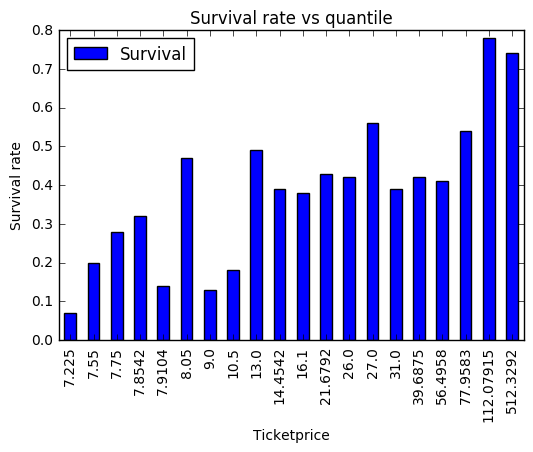

In [66]:
#Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.
import numpy as np
survival={}
last_quant=0
for i in range(0,100,5):
    quant_temp=df['Fare'].quantile(0.01 * (i + 5))
    df_temp=df[(df['Fare'] < quant_temp) & (df['Fare'] >= last_quant)]
    total=len(df_temp.index)
    survival_quant=round(df_temp['Survived'].sum() / total, 2)
    survival[quant_temp]=survival_quant
    last_quant=quant_temp

%matplotlib inline
import matplotlib.pyplot as plt
survival_df=pd.DataFrame.from_dict(survival,orient='index')
survival_df.columns=['Survival' ]
survival_df.sort_index(axis=0, ascending=True, inplace=True) 
survival_df.plot(kind='bar', legend=True)
plt.xlabel("Ticketprice")
plt.ylabel("Survival rate")
plt.title("Survival rate vs quantile")

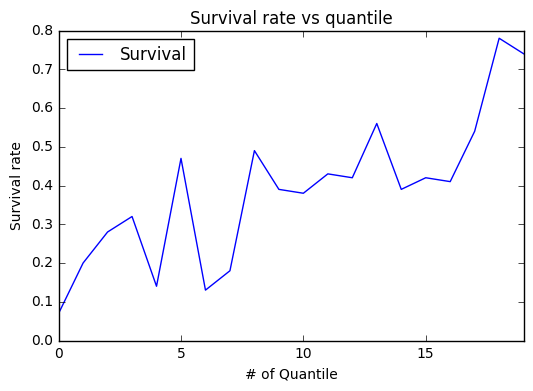

In [158]:
survival_df.reset_index()['Survival'].plot( legend=True)
plt.xlabel("# of Quantile")
plt.ylabel("Survival rate")
plt.title("Survival rate vs quantile")


**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [101]:
print( "Median of age: {}.".format(df['Age'].median()))
print( "Median of Fare: {}.".format(df['Fare'].median()))
print( "Median of Siblings/spouses: {}.".format(df['SibSp'].median()))
print( "Median of Parents/children: {}.".format(df['Parch'].median()))

Median of age: 28.0.
Median of age: 14.4542.
Median of age: 0.0.
Median of age: 0.0.


**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [169]:
column=['Age','Fare','SibSp','Parch']
max_diff=0.00
best_choice=''
for col in column:
    med=df[col].median()
    low_surv_rate=float(df[df[col] <= med]['Survived'].sum() / len(df[df[col] <= med].index))
    high_surv_rate=df[df[col] > med]['Survived'].sum() / len(df[df[col] > med].index)
    diff_surv_rate=round(abs(low_surv_rate-high_surv_rate),4)
    if diff_surv_rate>max_diff:
        max_diff=diff_surv_rate
        best_choice=col
    print(col, diff_surv_rate)
print()
print( "The best choice would be the {0}, it has the biggest difference between the survival rate of passengers below and above the median: {1}.".format(best_choice,max_diff))
    
#The best choice would be the Fare, it has the biggest difference between the survival rate of passengers below and above the median.

Age 0.0054
Fare 0.2675
SibSp 0.121
Parch 0.1681

The best choice would be the Fare, it has the biggest difference between the survival rate of passengers below and above the median: 0.2675.


**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

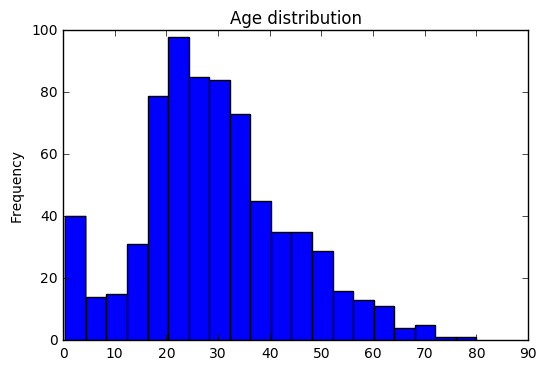

In [182]:
#Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.
df['Age'].plot(kind='hist',bins=20)

plt.title("Age distribution")

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [198]:
total=len(df.index)

print("The probability,that a passenger survived: {}%.".format(round(len(df[df['Survived']==1].index)/total*100,2)))
print("The probability,that a passenger was male: {}%.".format(round(len(df[df['Sex']=='male'].index)/total*100,2)))
print("The probability,that a passenger was female and had at least one sibling or spouse on board: {}%.".format(round(len(df[(df['Sex']=='female') & (df['SibSp']>=1)].index)/total*100,2)))
print("The probability,that a survivor was from Cherbourg: {}%.".format(round(len(df[df['Embarked']=='C'].index)/total*100,2)))
print("The probability,that a passenger was less than 10 years old: {}%.".format(round(len(df[df['Age']<10].index)/total*100,2)))
print("The probability,that a passenger was between 25 and 40 years old: {}%.".format(round(len(df[( df['Age'] >= 25) & (df['Age'] <=40)].index)/total*100,2)))
print("The probability,that a passenger was either younger than 20 years old or older than 50: {} %.".format(round(len(df[( df['Age'] > 50) | (df['Age'] < 25)].index)/total*100,2)))

The probability,that a passenger survived: 38.38%.
The probability,that a passenger was male: 64.76%.
The probability,that a passenger was female and had at least one sibling or spouse on board: 15.71%.
The probability,that a survivor was from Cherbourg: 18.86%.
The probability,that a passenger was less than 10 years old: 6.96%.
The probability,that a passenger was between 25 and 40 years old: 32.1%.
The probability,that a passenger was either younger than 20 years old or older than 50: 38.38 %.


**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [10]:
#The probability,that a passenger survived: 38.38%.
#binomial distribution
total=len(df.index)
survival_rate=round(len(df[df['Survived']==1].index)/total,4)

from scipy.stats import binom
print("The probability, that exactly 42 passengers will survive from 100 is: {}%.".format(binom.pmf(42, 100, survival_rate)*100.0))


The probability, that exactly 42 passengers will survive from 100 is: 6.12944086909794%.


**What’s the probability that at least 42 of those 100 passengers survive?**

In [220]:

from scipy.stats import binom
print("The probability, that at least 42 passengers will survive from 100 is: {}%.".format(100-binom.cdf(41, 100, survival_rate)*100.0))


The probability, that at least 42 passengers will survive from 100 is: 25.914971706790496%.


**Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.**

Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.

In [26]:
#Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.
def sample_ratio_survive(N):
    samples_surv={}
    count_survived=0
    for i in range(N):
        sample=df.sample(n=100 , random_state=12345*i)
        if len(sample[sample['Survived']==1].index)>=42:
            samples_surv[i]=sample[['PassengerId', 'Survived']]
            count_survived+=1
    return count_survived/N
sample_ratio_survive(5)

        

0.6

In [34]:
#probability that 1 peron survives
#survival_rate=round(len(df[df['Survived']==1].index)/total,4)


p_gr42_data=1.0000-binom.cdf(41, 100, survival_rate)
p_gr42_estimated=0.0000
N=0
sample_surv=[]

while p_gr42_data-0.0005>p_gr42_estimated or p_gr42_estimated>p_gr42_data+0.0005:
    N+=1
    p_gr42_estimated=sample_ratio_survive(N)
    sample_surv.append([N,p_gr42_estimated])

print ("{} random samples are needed to take that the fraction matches the calculated probability. The fraction is: {}.".format(N , round(p_gr42_estimated,6)))

27 random samples are needed to take that the fraction matches the calculated probability. The fraction is: 0.259259.


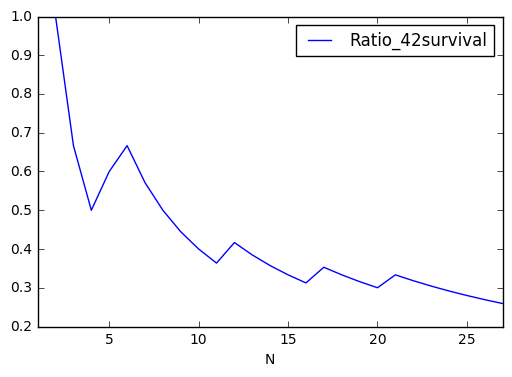

In [42]:
temp_df=pd.DataFrame(sample_surv, columns=['N','Ratio_42survival'])
temp_df.plot(x='N')


**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [122]:
from scipy import stats
import numpy as np

male=df[(df['Sex']=='male') & (df['Survived']==1) ]['Age'].dropna()
female=df[(df['Sex']=='female') & (df['Survived']==1)]['Age'].dropna()

tstat , pvalue = stats.ttest_ind(male,female)
print(pvalue)
#The significance is usually set at alfa=5% (or below). If p value is smaller then alfa, then the 2 means are significantly different. This is not the case
if pvalue<0.05/2:
    print("At a 5% signifikance level, there is  a statistically significant difference between the ages of male and female survivors.")
else:
    print("At a 5% signifikance level, there is  no statistically significant difference between the ages of male and female survivors.")

    

0.404344062022
At a 5% signifikance level, there is  no statistically significant difference between the ages of male and female survivors.


In [121]:
Queenstown=df[(df['Embarked']=='Q')  ]['Fare'].dropna()
Cherbourg=df[(df['Embarked']=='C') ]['Fare'].dropna()

tstat , pvalue = stats.ttest_ind(Queenstown,Cherbourg)
print(round(pvalue,4))
#The pvaleu is almost 0. That means, at any significance level, there is a statsitcally significant difference between the prices.
if pvalue<0.05/2:
    print("At a 5% signifikance level, there is  a statistically significant difference between the fares paid by passengers from Queenstown and the passengers from Cherbourg.")
else:
    print("At a 5% signifikance level, there is  no statistically significant difference between the fares paid by passengers from Queenstown and the passengers from Cherbourg.")


0.0
At a 5% signifikance level, there is  a statistically significant difference between the fares paid by passengers from Queenstown and the passengers from Cherbourg.


**Accompany your p-values with histograms showing the distributions of both compared populations.**

(array([  6.,   6.,   5.,   2.,   0.,   2.,   7.,  10.,  15.,   4.,  14.,
         16.,   8.,  10.,  14.,   9.,  19.,   4.,   9.,   5.,   3.,   3.,
          4.,   6.,   3.,   4.,   2.,   3.,   1.,   3.]),
 array([  0.75 ,   2.825,   4.9  ,   6.975,   9.05 ,  11.125,  13.2  ,
         15.275,  17.35 ,  19.425,  21.5  ,  23.575,  25.65 ,  27.725,
         29.8  ,  31.875,  33.95 ,  36.025,  38.1  ,  40.175,  42.25 ,
         44.325,  46.4  ,  48.475,  50.55 ,  52.625,  54.7  ,  56.775,
         58.85 ,  60.925,  63.   ]),
 <a list of 30 Patch objects>)

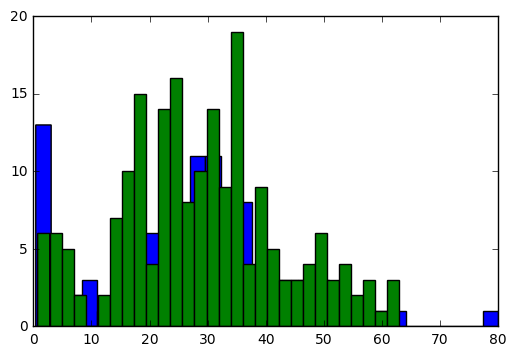

In [98]:

fig, ax=plt.subplots()
ax.hist(male, bins=30)
ax.hist(female, bins=30)


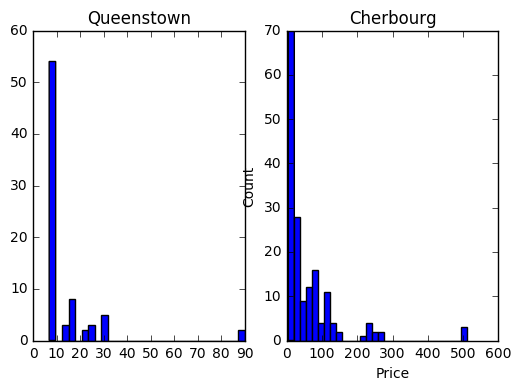

In [109]:
fig, (ax1, ax2)=plt.subplots(1,2)
ax1.hist(Queenstown, bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
ax1.set_title('Queenstown')
ax2.hist(Cherbourg, bins=30)
ax2.set_title('Cherbourg')

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [115]:
survived=df[df['Survived']==1]['Fare'].dropna()
non_survived=df[df['Survived']==0]['Fare'].dropna()
tstat , pvalue = stats.ttest_ind(survived,non_survived)
print(pvalue)
# If p value is smaller then alfa (e.g.5%), then the 2 means are significantly different -> at any significance level is the price different
if pvalue<0.05:
    print("At a 5% signifikance level, there is  a statistically significant difference between the ticket prices of survivors and non-survivors.")
else:
    print("At a 5% signifikance level, there is  no statistically significant difference between the ticket prices of survivors and non-survivors.")

   

6.12018934192e-15
At a 95% signifikance level, there is  a statistically significant difference between the ticket prices of survivors and non-survivors.


**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [120]:
#Did a given first-class passenger have less family members on board than a given third-class passenger
first_class=(df[df['Pclass']==1]['Parch']+df[df['Pclass']==1]['SibSp']).dropna()
third_class=(df[df['Pclass']==3]['Parch']+df[df['Pclass']==3]['SibSp']).dropna()

tstat , pvalue = stats.ttest_ind(first_class,third_class)
print(pvalue)
# P value is 0.096 -> at a 10% signifikance level, there is now difference, but at a 5% signifikance level there is a difference 
if pvalue<0.05:
    print("At a 5% signifikance level, there is  a statistically significant difference between the ticket prices of survivors and non-survivors.")
else:
    print("At a 5% signifikance level, there is  no statistically significant difference between the ticket prices of survivors and non-survivors.")

   

0.0959731153319
At a 95% signifikance level, there is  no statistically significant difference between the ticket prices of survivors and non-survivors.
